In [45]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/processed.csv")
df_fair = pd.read_csv("../data/fair_processed_Sex_Age.csv")

In [46]:
df_old = df[df['Age'] !=  'Younger']
df_young = df[df['Age']== 'Younger']

Confusion matrix: old customers


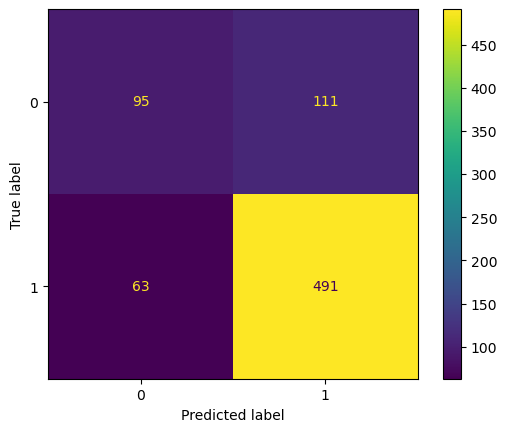

In [47]:
cm = confusion_matrix(df_old['label_value'], df_old['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: old customers")

Confusion matrix: young customers


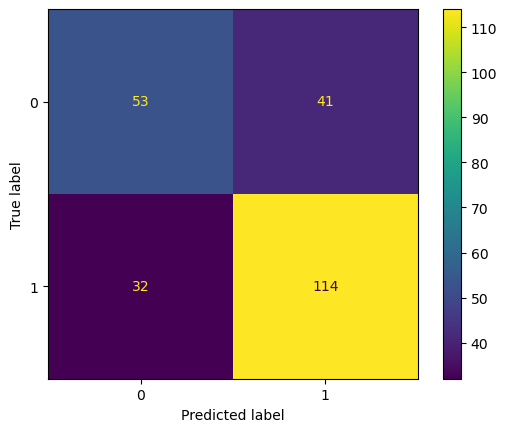

In [48]:
cm = confusion_matrix(df_young['label_value'], df_young['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: young customers")

In [49]:
def fairness_stats(y_pred, y):
    TP = np.sum(y[y_pred == y] == 1)
    TN = np.sum(y[y_pred == y] == 0)
    FP = np.sum(y[y_pred != y] == 1)
    FN = np.sum(y[y_pred != y] == 0)

    #group_fair = (TP+FP) / len(y)
    #ufficiency = (TP+FN) / (TP+FP)
    #separation = (TP+FP) / (TP+FN)
    #Eq_opp = TP / (TP+FP)
    #avg_odd = Eq_opp - ((FP) / (TP+FP))
    
    false_pos = FP / (TP+FP)
    false_neg = FN / (TP + FN)

    return [false_pos, false_neg]


old_stat = fairness_stats(df_old['label_value'], df_old['score'])
young_stat = fairness_stats(df_young['label_value'], df_young['score'])
print(f"old {old_stat}")
print(f"young {young_stat}")
print(f"dif {np.array(young_stat) - np.array(old_stat)}")


old [0.18438538205980065, 0.11371841155234658]
young [0.2645161290322581, 0.2191780821917808]
dif [0.08013075 0.10545967]


In [50]:
df_fair_old = df_fair[df_fair['Age'] !=  'Younger']
df_fair_young = df_fair[df_fair['Age']== 'Younger']

Confusion matrix: old customers


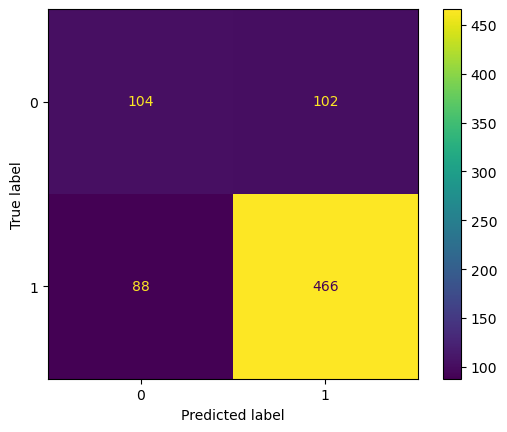

In [51]:
cm = confusion_matrix(df_fair_old['label_value'], df_fair_old['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: old customers")

Confusion matrix: young customers


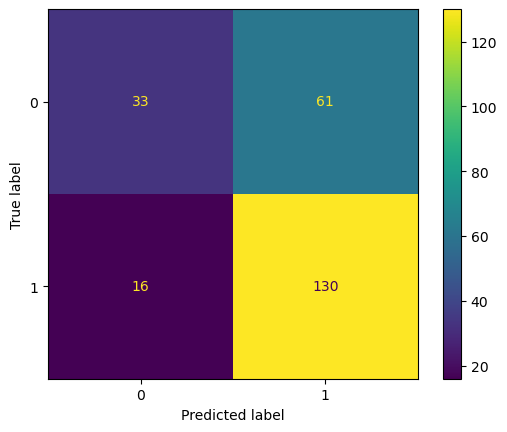

In [52]:
cm = confusion_matrix(df_fair_young['label_value'], df_fair_young['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: young customers")

In [53]:
old_fair_stat = fairness_stats(df_fair_old['label_value'], df_fair_old['score'])
young_fair_stat = fairness_stats(df_fair_young['label_value'], df_fair_young['score'])
print(f"old {old_fair_stat}")
print(f"young {young_fair_stat}")
print(f"dif {np.array(young_fair_stat) - np.array(old_fair_stat)}")

old [0.1795774647887324, 0.1588447653429603]
young [0.3193717277486911, 0.1095890410958904]
dif [ 0.13979426 -0.04925572]
